In [2]:
import sys
backtest_path=sys.path[0]+"/backtest/"
sys.path.append( backtest_path )
from data_engine import DataEngine
from backtesting import Backtesting
import pandas as pd
import ta
import ccxt
import json
import pandas_ta as pda
sys.path.append(sys.path[0]+'/utilities')
from custom_indicators import CustomIndocators
from custom_indicator_2 import SuperTrend


f = open(backtest_path+'pair_list.json',)
pairJson = json.load(f)
f.close()

In [ ]:
#Telecharger l'historique des tokens
pairList = pairJson['bigwill']
timeframe = '1h'
startDate = '2021-04-03T00:00:00'

#dataEngine = DataEngine(session=ccxt.hitbtc())
dataEngine = DataEngine(session=ccxt.binance())

dataEngine.download_data(pairList, timeframe, startDate)



In [ ]:
# Mise a jour de l'historique des tokens
# -- Data variable --
pairList = pairJson['bigwill']
timeframes = '1h'

# -- Instance class --
dataEngine = DataEngine(session=ccxt.binance())

# -- Download data from data variable --
dataEngine.update_data(pairList, timeframes)

In [ ]:
dataEngine = DataEngine(session=ccxt.binance())

pairList = pairJson['bigwill']
timeframe = '1h'
startDate = '2021-04-03T00:00:00'

dfList = []
for pair in pairList:
    df = dataEngine.get_historical_from_db(pair, timeframe, startDate)
    dfList.append(df)

print("Data load 100%")
dfList[0]

In [18]:
# -- Indicator variable --
aoParam1 = 6
aoParam2 = 22
stochWindow = 14
willWindow = 14

#TRIX
trixLength = 9
trixSignal = 21

#print(dfList)
# -- Drop all columns we do not need --
for df in dfList:
    try:
         # -- Drop all columns we do not need --
        df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

        # -- Indicators, you can edit every value --
        df['AO'] = CustomIndocators.awesome_oscillator(df, aoParam1, aoParam2) 
        
        df['EMA100'] =CustomIndocators.ema(df['close'], 100)
        df['EMA200'] =CustomIndocators.ema(df['close'], 200)
       
        df['STOCH_RSI'] = CustomIndocators.stoch_rsi(df, stochWindow)

        df = CustomIndocators.william_r(df, willWindow) 
        
        
        # --- Ichimocu
        #EMA 50
        df['EMA50']=CustomIndocators.ema(df['close'], 50)
        #dfList[coin]['SSA'] -- dfList[coin]['SSB'] -- dfList[coin]['kijun'] -- dfList[coin]['tenkan'] -- dfList[coin]['ssa'] -- dfList[coin]['ssb'] -- dfList[coin]['ssa25'] --dfList[coin]['ssb25'] -- dfList[coin]['ssa52'] -- dfList[coin]['ssb52'] - dfList[coin]['close25'] -- dfList[coin]['close1']
        df=CustomIndocators.ichimoku(df)
        
        
        # --- TRIX
        df=CustomIndocators.trixIndicator(df, trixLength,trixSignal)
        
        # --- ALIGATOR
        # ALIGATOR
        df['EMA1']=CustomIndocators.ema(df['close'], 7) 
        df['EMA2']=CustomIndocators.ema(df['close'], 30) 
        df['EMA3']=CustomIndocators.ema(df['close'], 50) 
        df['EMA4']=CustomIndocators.ema(df['close'], 100)
        df['EMA5']=CustomIndocators.ema(df['close'], 121)
        df['EMA6']=CustomIndocators.ema(df['close'], 200)
        # #Average True Range (ATR)
        df['ATR'] = CustomIndocators.atr(df, 14) 
        # #Stochastic RSI
        df['STOCH_RSI_NON_MOYENNE'] = ta.momentum.stochrsi(close=df['close'], window=14, smooth1=3, smooth2=3) #Non moyenné 
        
        # --- SuperTrend
        df['EMA90']=CustomIndocators.ema(df['close'], 90)
        ST_length = 20
        ST_multiplier = 3.0
        superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
        df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
        df['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

        ST_length = 20
        ST_multiplier = 4.0
        superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
        df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
        df['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

        ST_length = 40
        ST_multiplier = 8.0
        superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
        df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
        df['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]
        # df['close-1'] = df['close'].shift(periods=1)
        # df['FINAL_SUPER_UP'] = 0
        
        # --- Cross_EMA_+_stoch_RSI
        df['EMA28']=CustomIndocators.ema(df['close'], 28)
        df['EMA48']=CustomIndocators.ema(df['close'], 48)
        
        
    except BaseException as err:
        print("An error occured", err)
        exit()
   

print("Indicators loaded 100%")
dfList[0]

Indicators loaded 100%


,open,high,low,close,volume,AO,EMA100,EMA200,STOCH_RSI,WillR,...,EMA6,ATR,STOCH_RSI_NON_MOYENNE,EMA90,SUPER_TREND,SUPER_TREND_DIRECTION1,SUPER_TREND_DIRECTION2,SUPER_TREND_DIRECTION3,EMA28,EMA48
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-04-03 00:00:00,58950.01,59450.08,58931.30,59387.13,1706.898053,0.000000,59387.130000,59387.130000,0.000000,-12.134238,...,59387.130000,0.000000,NaN,59387.130000,0.000000,1,1,1,59387.130000,59387.130000
2021-04-03 01:00:00,59387.13,59391.76,59003.00,59254.98,1295.372272,0.000000,59384.513168,59385.815075,0.000000,-37.607464,...,59385.815075,0.000000,NaN,59384.225604,NaN,1,1,1,59378.016207,59381.736122
2021-04-03 02:00:00,59254.98,59410.15,59124.32,59408.20,1232.436973,0.000000,59384.982214,59386.037810,0.000000,-8.072786,...,59386.037810,0.000000,NaN,59384.752514,NaN,1,1,1,59380.097848,59382.816281
2021-04-03 03:00:00,59408.20,59430.00,59153.16,59221.53,944.716561,0.000000,59381.745537,59384.400917,0.000000,-44.055284,...,59384.400917,0.000000,NaN,59381.165206,NaN,1,1,1,59369.162134,59376.233167
2021-04-03 04:00:00,59221.52,59463.17,59191.98,59394.92,1092.556173,0.000000,59382.006417,59384.505584,0.000000,-12.832083,...,59384.505584,0.000000,NaN,59381.467509,NaN,1,1,1,59370.938539,59376.995895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-19 10:00:00,16635.10,16645.80,16622.06,16636.66,1978.272380,-29.434470,16712.561587,17032.924285,0.612956,-52.350109,...,17032.924285,67.243402,0.612956,16698.157203,17457.528620,1,1,-1,16658.580769,16670.210714
2022-11-19 11:00:00,16636.33,16651.19,16636.33,16647.15,338.444000,-15.940303,16711.266308,17029.085735,0.773347,-46.337269,...,17029.085735,63.501731,0.773347,16697.036166,17449.740654,1,1,-1,16657.792440,16669.269460
2022-11-19 12:00:00,16676.26,16686.86,16640.00,16654.20,4225.225390,-2.080985,16710.136282,17025.355528,0.883330,-42.296228,...,17025.355528,62.313036,0.883330,16696.094712,17449.740654,1,1,-1,16657.544685,16668.654380


In [19]:
dfTestList = []
for df in dfList:
    dfTestList.append(df.loc['2021-8-15':])

# -- Starting value --
startingBalance = 100
makerFee = 0
takerFee = 0.0007

# -- Rules --
StopLossActivation = False
takeProfitActivation = True
showLog = True

# -- Hyper parameters --
stochOverBought = 0.8
stochOverSold = 0.2
SlPct = 0.015
TpPct = 0.15
willOverSold = -85
willOverBought = -10
maxPositions = 3

#TRIX
stochTop = 0.7
stochBottom = 0.28

# -- Trade Functions --



# ICHIMOKU
# -- Condition to BUY market --
#def buyCondition(row, previousRow=None):
#    if (row['close']>row['SSA'] and row['close']>row['SSB'] and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA50'] ):
#        return True
#    else:
#        return False

# -- Condition to SELL market --
#def sellCondition(row, previousRow=None):
#    if (row['close'] < row['SSA'] or row['close'] < row['SSB']) and row['STOCH_RSI'] > 0.2:
#        return True
#    else:
#        return False
# FIN ICHIMOKU

# BIGWILL
# -- Condition to BUY market --
#def buyCondition(row, previousRow=None):
#    if (
#        row['AO'] >= 0
#        and previousRow['AO'] > row['AO']
#        and row['WillR'] < willOverSold
#        and row['EMA100'] > row['EMA200']
#    ):
#        return True
#    else:
#        return False

# -- Condition to SELL market --
#def sellCondition(row, previousRow=None):
#    if (
#        (row['AO'] < 0
#        and row['STOCH_RSI'] > stochOverSold)
#        or row['WillR'] > willOverBought
#    ):
#        return True
#    else:
#        return False

# FIN BIGWILL

# TRIX
# -- Condition to BUY market --
#def buyCondition(row, previousRow=None):
#    if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < stochTop:
#        return True
#    else:
#        return False

# -- Condition to SELL market --
#def sellCondition(row, previousRow=None):
#    if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > stochBottom:
#        return True
#    else:
#        return False
# FIN TRIX


# ALIGATOR
# -- Condition to BUY market --
#def buyCondition(row, previousRow=None):
#    if row['EMA1'] > row['EMA2'] and row['EMA2'] > row['EMA3'] and row['EMA3'] > row['EMA4'] and row['EMA4'] > row['EMA5'] and row['EMA5'] > row['EMA6'] :
#        return True
#    else:
#        return False

# -- Condition to SELL market --
#def sellCondition(row, previousRow=None):
#    if row['EMA6'] > row['EMA1'] and row['STOCH_RSI_NON_MOYENNE']>0.2:
#        return True
#    else:
#        return False
# FIN ALIGATOR

# SUPERTREND
# -- Condition to BUY market --
#def buyCondition(row, previousRow=None):
#    if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA50'] :
#        return True
#    else:
#        return False

# -- Condition to SELL market --
#def sellCondition(row, previousRow=None):
#    if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1 and row['STOCH_RSI'] > 0.2:
#        return True
#    else:
#        return False
# FIN SUPERTREND

# Cross_EMA + stoch_RSI
# -- Condition to BUY market --
def buyCondition(row, previousRow=None):
    if row['EMA28'] > row['EMA48'] and row['STOCH_RSI'] < 0.8:
        return True
    else:
        return False

# -- Condition to SELL market --
def sellCondition(row, previousRow=None):
    if row['EMA28'] < row['EMA48'] and row['STOCH_RSI'] > 0.2:
        return True
    else:
        return False
# FIN Cross_EMA + stoch_RSI


# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
stopLoss = [0] * len(pairList)
takeProfit = [5000000] * len(pairList)
walletCoinArray = [0] * len(pairList)
walletUsdArray = [0] * len(pairList)
activePositions = 0
lastIndex = dfTestList[0].index.values[1]

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'symbol','position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet'])

# # -- Iteration on all your price dataset (df) --
for index, row in dfTestList[0].iterrows():
    # -- Check if you have one coin in your wallet --
    if (walletCoinArray.count(0) == len(walletCoinArray)) == False:
        # -- Iteration on all coin (upgrade possible: only check coin in your wallet) --
        for i in range(0,len(dfTestList)):
            # -- Check if you have more than 0 coin --
            if walletCoinArray[i] != 0:
                try:
                    actualRow = dfTestList[i].loc[index]
                    previousRow = dfTestList[i].loc[lastIndex]
                    # -- Stop Loss --
                    if actualRow['low'] < stopLoss[i] :
                        sellPrice = stopLoss[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Stop Loss", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Stop Loss',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Take Profit --
                    elif actualRow['high'] > takeProfit[i] :
                        sellPrice = takeProfit[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Take Profit", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Take Profit',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Sell Market --
                    elif sellCondition(actualRow,previousRow):
                        sellPrice = actualRow['close']
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = takerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell", pairList[i],"at", sellPrice, '$ the', index)

                        # -- Add the trade to DfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Market Order',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)
                except:
                    pass
    # -- Buy market order --
    # -- Check if you can open a new position --
    if activePositions < maxPositions:
        # -- Check buy condition for each coin of list --
        for i in range(0,len(dfTestList)):
            try:
                actualRow = dfTestList[i].loc[index]
                previousRow = dfTestList[i].loc[lastIndex]
                # -- Buy condition --
                if buyCondition(actualRow, previousRow) and activePositions < maxPositions and walletCoinArray[i]==0 :
                    buyPrice = actualRow['close']
                    # -- Define size of the position --
                    usdMultiplier = 1/(maxPositions-activePositions)
                    fee = takerFee * usd * usdMultiplier
                    usd = usd - fee
                    coin = (usd * usdMultiplier) / buyPrice
                    usd = usd - (usd * usdMultiplier)
                    # -- Set coin and equivalent usd to size of position after open position --
                    walletCoinArray[i] = coin
                    walletUsdArray[i] = coin * actualRow['close']
                    activePositions += 1
                    # -- Create a Stop Loss --
                    if StopLossActivation:
                        stopLoss[i] = buyPrice - SlPct * buyPrice
                    # -- Create a Take Profit --
                    if takeProfitActivation:
                        takeProfit[i] = buyPrice + TpPct * buyPrice

                    # -- LOG --
                    if showLog:
                        print("Buy", pairList[i],"at", buyPrice, '$ the', index)

                    # -- Add the trade to dfTrades to analyse it later --
                    myrow = {
                        'date': index,
                        'symbol': pairList[i],
                        'position': "Buy",
                        'reason': 'Buy Market Order',
                        'price': buyPrice,
                        'frais': fee,
                        'fiat': usd,
                        'coins': coin,
                        'wallet': sum(walletUsdArray) + usd
                    }
                    dfTrades = dfTrades.append(myrow, ignore_index=True)
            except:
                pass

    # -- Keep last index to define last row --            
    lastIndex = index

print("Final wallet", sum(walletUsdArray) + usd)


Buy BNB/USDT at 407.76 $ the 2021-08-15 00:00:00
Buy AVAX/USDT at 18.102 $ the 2021-08-15 00:00:00
Buy SHIB/USDT at 8.07e-06 $ the 2021-08-15 00:00:00
Sell COIN at Take Profit 9.2805e-06 $ the 2021-08-16 11:00:00
Buy BTC/USDT at 47516.95 $ the 2021-08-16 11:00:00
Sell COIN at Take Profit 20.8173 $ the 2021-08-16 17:00:00
Buy ETH/USDT at 3219.67 $ the 2021-08-16 17:00:00
Sell ETH/USDT at 3184.83 $ the 2021-08-16 22:00:00
Buy LTC/USDT at 180.88 $ the 2021-08-16 22:00:00
Sell BTC/USDT at 46285.46 $ the 2021-08-17 01:00:00
Buy DOGE/USDT at 0.32837 $ the 2021-08-17 01:00:00
Sell LTC/USDT at 178.0 $ the 2021-08-17 06:00:00
Buy SOL/USDT at 71.164 $ the 2021-08-17 06:00:00
Sell DOGE/USDT at 0.29803 $ the 2021-08-18 01:00:00
Buy AVAX/USDT at 23.007 $ the 2021-08-18 01:00:00
Sell BNB/USDT at 398.33 $ the 2021-08-18 04:00:00
Buy FTM/USDT at 0.39429 $ the 2021-08-18 04:00:00
Sell COIN at Take Profit 26.45805 $ the 2021-08-18 14:00:00
Buy SUSHI/USDT at 12.82 $ the 2021-08-18 14:00:00
Sell SUSHI/USD

In [20]:
BTobject = Backtesting()
newDf = BTobject.multi_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTestList[0], pairList=pairList, timeframe=timeframe)

Trading Bot on : 25 coins | Timeframe : 1h
Period : [2021-08-15 00:00:00] -> [2022-11-19 14:00:00]
Starting balance : 99.97666666666667 $

----- General Informations -----
Final balance : 26.75 $
Performance vs US Dollar : -73.25 %
Bitcoin Buy and Hold Performence : -64.71 %
Performance vs Buy and Hold : -24.19 %
Best trade : +5.51 %, the 2022-07-18 22:00:00
Worst trade : -11.75 %, the 2021-12-04 08:00:00
Worst drawDown : - 85.29 %
Total fees :  24.63 $

----- Trades Informations -----
Total trades on period : 726
Number of positive trades : 225
Number of negative trades :  501
Trades win rate ratio : 30.99 %
Average trades performance : -0.13 %
Average positive trades : 2.47 %
Average negative trades : -1.3 %

----- Trades Reasons -----
Buy Market Order     729
Sell Market Order    630
Sell Take Profit      96
Name: reason, dtype: int64

----- Pair Result -----
-----------------------------------------------------------------------------------------------
Trades      Pair     Sum-resu

----- 2021 Performances: -11.53% -----


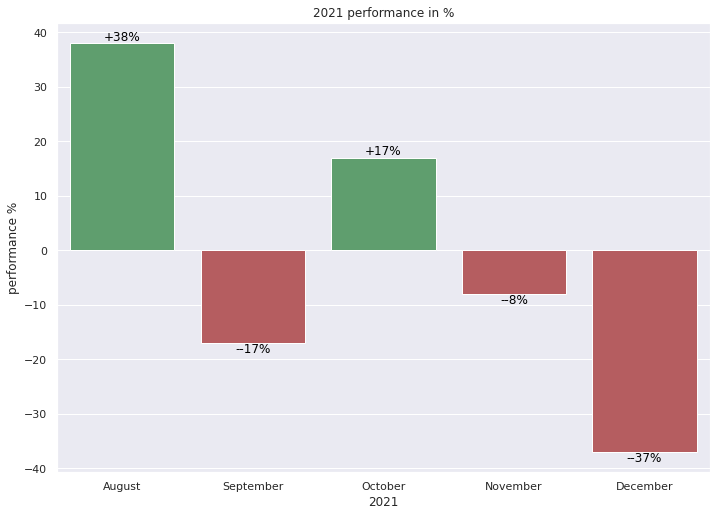

----- 2022 Performances: -69.1% -----


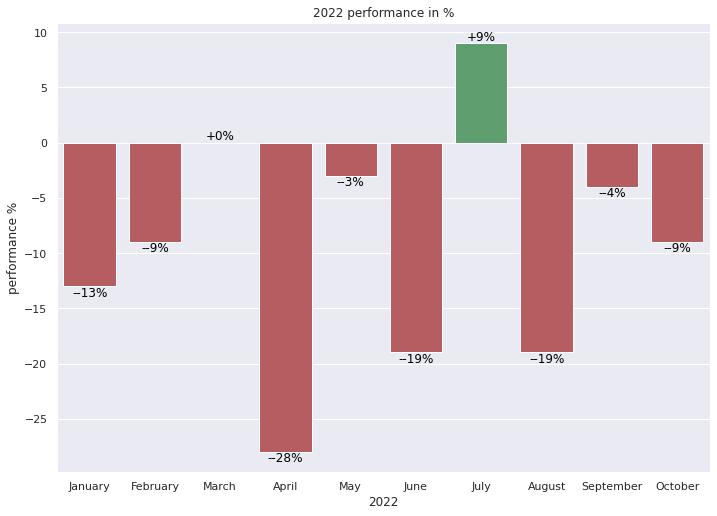

In [21]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)

/tmp/ipykernel_2492013/3056460112.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  BTobject.plot_wallet_evolution(dfTrades=newDf['2021'])



----- Plot -----


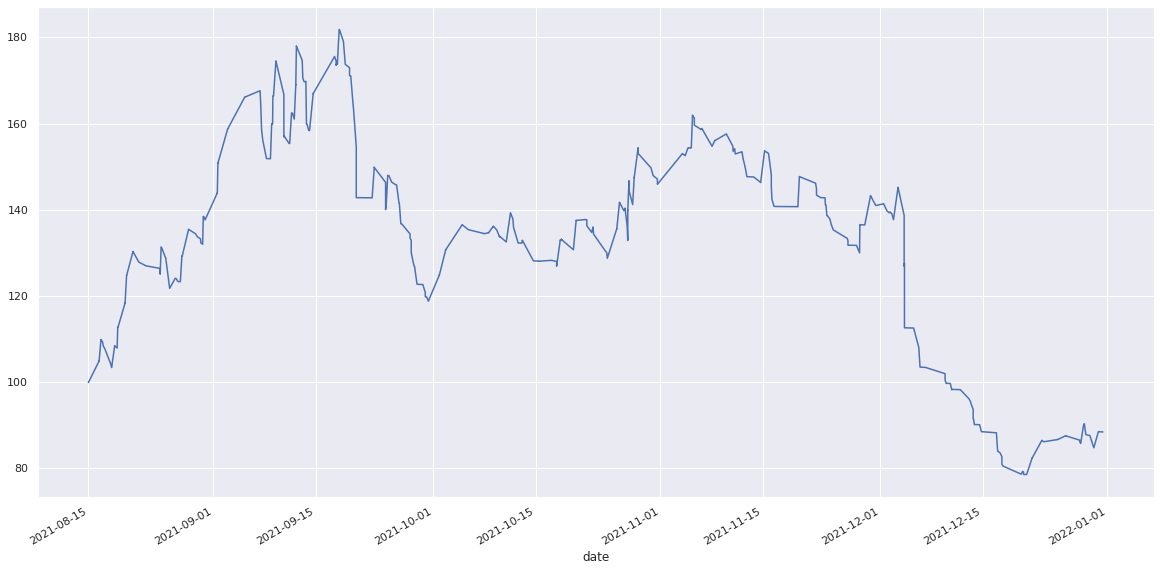

In [22]:
BTobject.plot_wallet_evolution(dfTrades=newDf['2021'])

In [23]:
dfTrades.iloc[-10:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet
1445,2022-11-17 11:00:00,BCH/USDT,Sell,Sell Market Order,102.800,0.006394,9.128306,0.000000,27.415010
1446,2022-11-17 11:00:00,COMP/USDT,Buy,Buy Market Order,39.820,0.006390,0.000000,0.229079,27.408620
1447,2022-11-17 16:00:00,SUSHI/USDT,Sell,Sell Market Order,1.248,0.006175,8.815456,0.000000,27.077289
1448,2022-11-17 16:00:00,COMP/USDT,Sell,Sell Market Order,39.380,0.006315,17.830263,0.000000,26.970179
1449,2022-11-17 19:00:00,LTC/USDT,Buy,Buy Market Order,60.450,0.006241,8.912011,0.147428,26.963939
1450,2022-11-18 03:00:00,BTC/USDT,Buy,Buy Market Order,16854.980,0.006238,0.000000,0.000528,26.957700
1451,2022-11-18 22:00:00,BTC/USDT,Sell,Sell Market Order,16665.730,0.006164,8.799614,0.000000,26.851541
1452,2022-11-18 22:00:00,BNB/USDT,Buy,Buy Market Order,273.300,0.006160,0.000000,0.032175,26.845381
1453,2022-11-19 09:00:00,BNB/USDT,Sell,Sell Market Order,270.600,0.006095,8.700487,0.000000,26.752414
1454,2022-11-19 09:00:00,BCH/USDT,Buy,Buy Market Order,104.700,0.006090,0.000000,0.083041,26.746324
